# GRIP : The Sparks Foundation

# Data Science and Business Analytics Intern

# Author : Darshit Thakkar

# Task 1 : Prediction Using Supervised ML

In this task, we have to predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.


In [26]:
#importing the Libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#loading the dataset
df = pd.read_csv('student_scores.csv')
#displaying the first 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
df.shape

(25, 2)

In [29]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [30]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


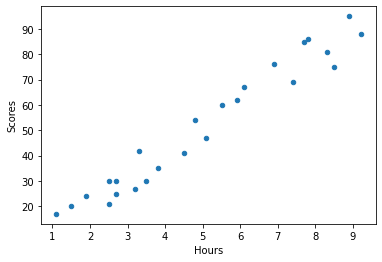

In [33]:
df.plot.scatter("Hours","Scores")

In [42]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [43]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [34]:
#Hours is independent attribute and Scores is dependent variable
X = df['Hours']
Y = df['Scores']

#spliting the data into training and testing data in the ratio 80:20
X_train = df ['Hours'][ : 20]
y_train = df['Scores'][ :20]
X_test = df['Hours'][20:25]
y_test = df['Scores'][20:25]

In [35]:
# taking mean of the training data
X_train = np. array (X_train)
mean_x = np. mean(X_train)
print("Mean of X train", mean_x)

y_train = np. array(y_train)
mean_y = np. mean(y_train)
print ("Mean of y train", mean_y)

Mean of X train 4.965000000000001
Mean of y train 50.3


In [36]:
#calculating the slope and intercept using the formula
n = len(X_train)
num = 0
deno = 0

for i in range(n):
    num = num + (X_train[i]-mean_x)*(y_train[i]- mean_y)
    deno = deno + (X_train[i]-mean_x) ** 2

m = num/ deno
c = mean_y - (m*mean_x)
print ( "Slope is : ", m)
print ("Intercept is: ", c)

Slope is :  9.520386094943449
Intercept is:  3.031283038605764


In [37]:
#predict the values
X_test = np.array(X_test)
y_test = np.array(y_test)
y_predicted = []
for i in range(len(X_test)) :
    y=m*X_test[i]+c
    y_predicted . append(y)
print(y_predicted)

[28.73632549495308, 48.72913629433432, 39.20875019939087, 68.72194709371557, 77.29029457916467]


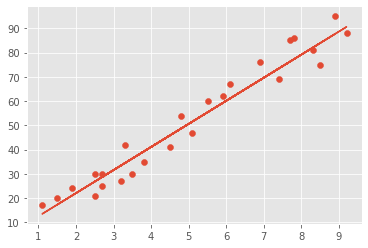

In [54]:
line = m*X + c
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

# What will be predicted score if a student studies for 9.25 hrs/ day? 

In [48]:
x=float (input('Enter the no. of hours: '))
y=c+m*x
print( 'The Score is {} % if student studies for {} hours '.format(y,x))

Enter the no. of hours: 9.25
The Score is 91.09485441683266 % if student studies for 9.25 hours 


In [40]:
#mean square error:
sub = 0
for i in range(len(y_test) ) :
    sub = sub + (y_test[i]-y_predicted[i])**2

mse = sub/len(y_test)
print ("Mean Squared Error is : ", mse)

Mean Squared Error is :  35.184295664737135


# Model Evaluation

In [46]:
from sklearn import metrics
from sklearn.metrics import r2_score
print ('MAE: ', metrics.mean_absolute_error(y_test, y_predicted))
print ('MSE: ', metrics.mean_squared_error (y_test, y_predicted) )
print ('RMSE : ', np.sqrt(metrics . mean_squared_error(y_test, y_predicted)))
print ('RMSE : ', r2_score(y_test, y_predicted))

MAE:  5.346209347444647
MSE:  35.184295664737135
RMSE :  5.931635159442727
RMSE :  0.9273291976521457
